# DECISION TREES

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from imblearn.over_sampling import SMOTE

# Importing and Splitting Given Dataset to obtain Training and Test Dataset

In [22]:
data = pd.read_csv('threats.csv')
# Feature Scaling using Z-Score Normalization
mean = data.mean()
std= data.std()
data = (data-mean)/std
data['Threat']=(data['Threat']*std.Threat + mean.Threat).astype(int) # Unscaling the "Threat" column
Y=data['Threat']
X=data.drop('Threat',axis=1)
# Oversampling the minority classes i.e. the Threat=1 class using SMOTE(Sythentic Minority Oversampling Technique)
smote=SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y) 
# Splitting the Dataset into test and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)  

# Creating and Training the Decision Tree Classifier on the Training Dataset

In [3]:
clf = DecisionTreeClassifier() # Creating a Decision Tree Claissifer
clf.fit(X_train,Y_train) # Training the Decision Tree Classifier on the Training Dataset
clf.get_params() # Printing the parameters used for the Decision Tree Classifier

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Making Predictions on the Test Dataset using the Trained Decision Tree Classifier and Plotting the Decision Tree

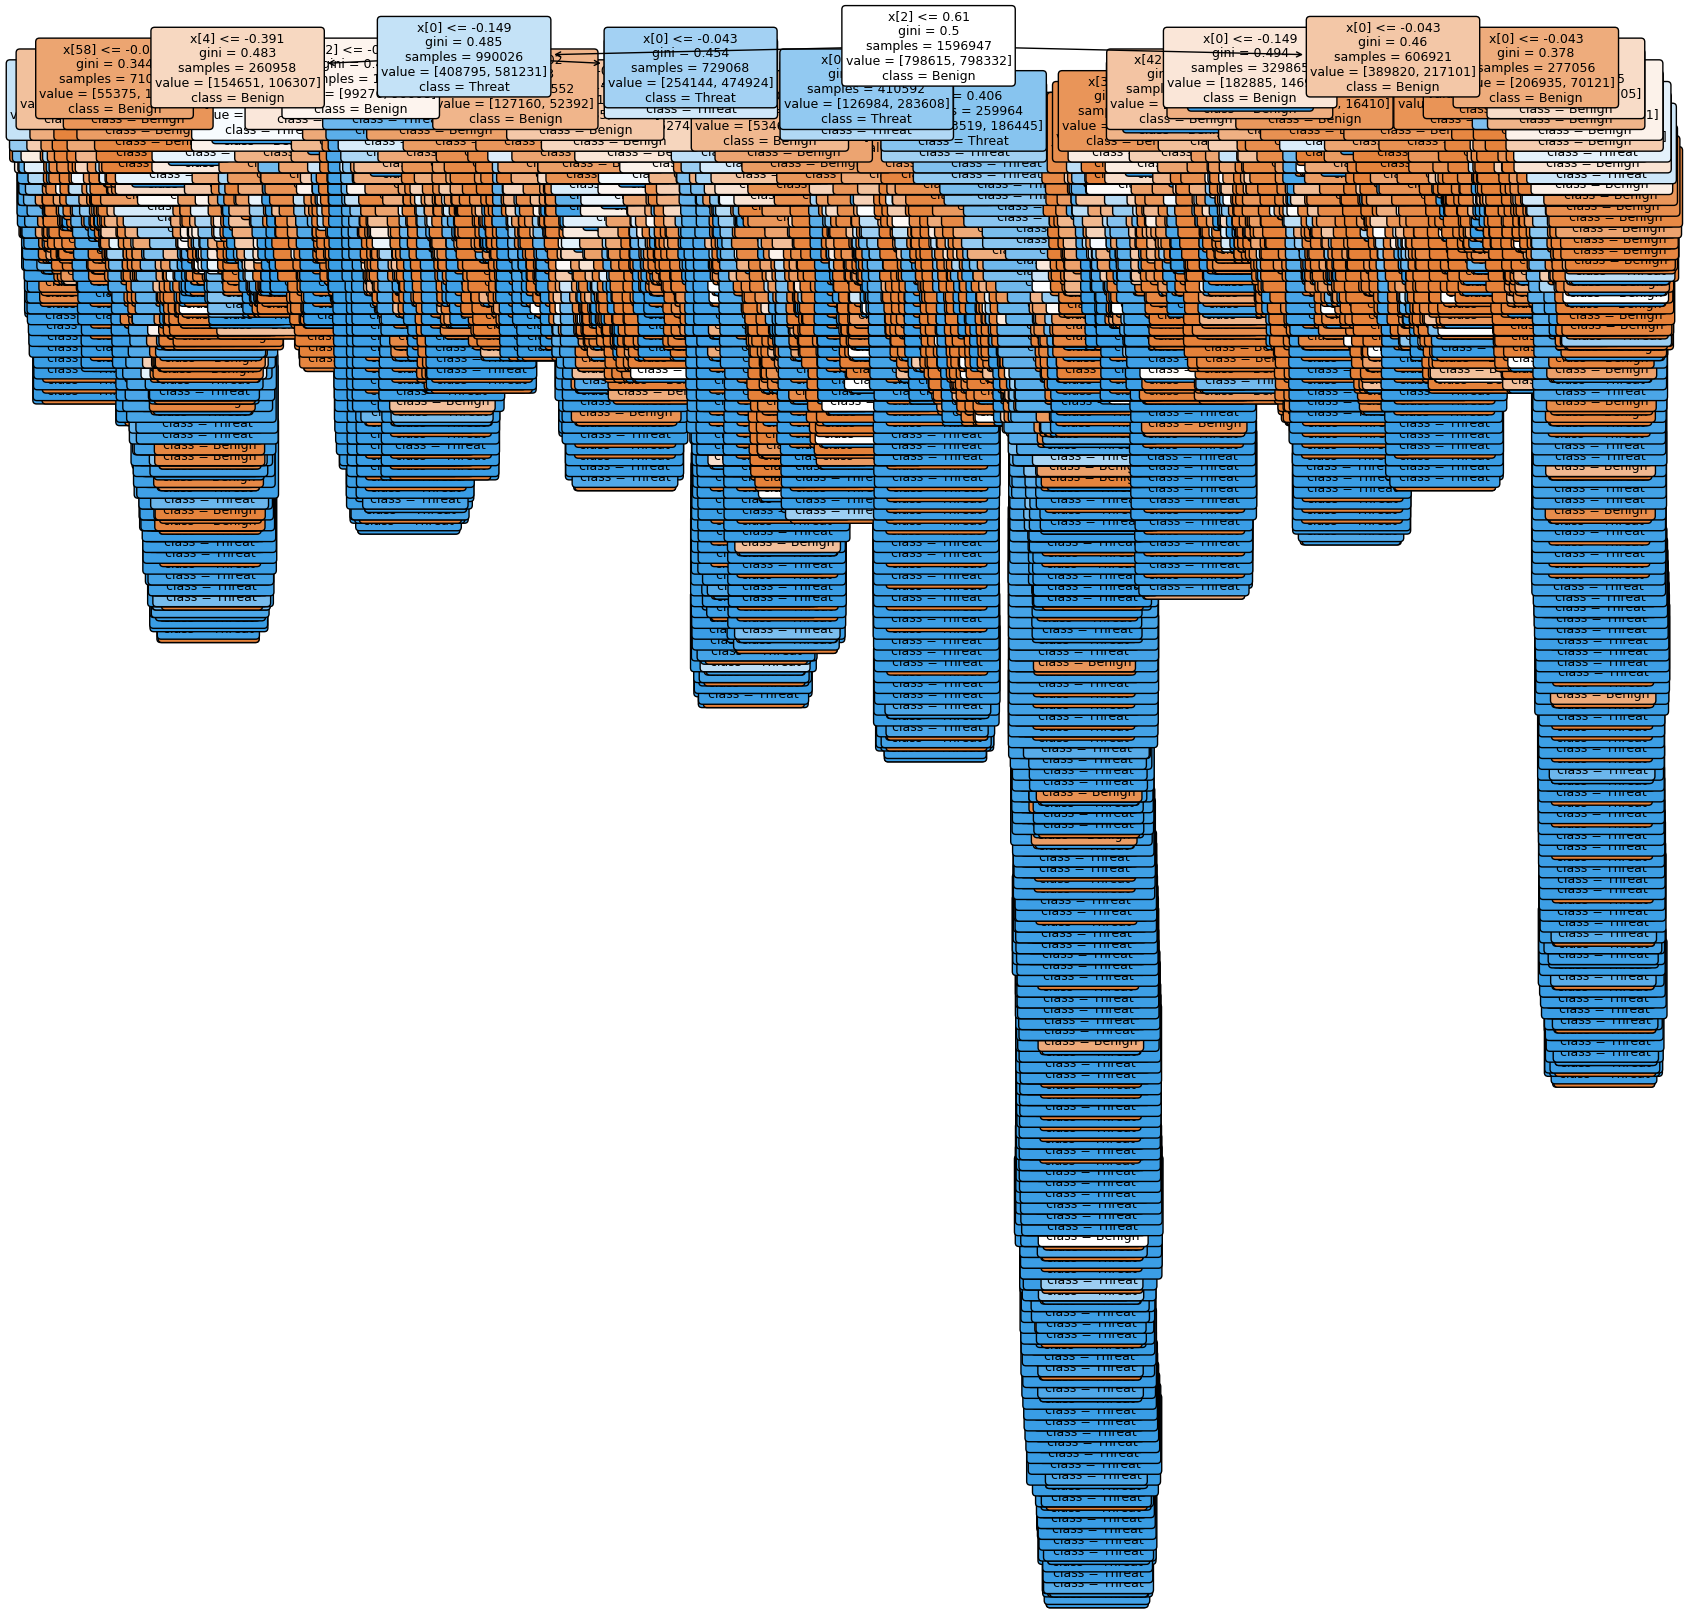

In [5]:

predictions = clf.predict(X_test)# Making Predictions on the Test Dataset using the trained Decision Tree Classifier

# Plotting the Trained Decision Tree Classifier
plt.figure(figsize=(20, 20)) # Defining a figure with Figure Size=20,20
tree.plot_tree(clf, filled=True, class_names={0:'Benign',1:'Threat'}, rounded=True,fontsize = 9)
plt.show()

# Cross Validaiton of Decision Tree Classifer Using Stratified K-Fold Technique

In [11]:
# Importing the Required Classes for Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Creating 5 Stratifed Folds i.e. 5 Folds with the same
                                                                              # Class Distribution as Original dataset
# Obtaining Cross Validation Results for the 5 Stratified Folds on Original Dataset with the Metric taken as Accuracy Score
cross_val_results = cross_val_score(clf, X_resampled, Y_resampled, cv=stratified_kfold, scoring='accuracy')
print(f"The Individual Cross Validation Scores are:{cross_val_results}")
print(f"The Average Cross Validation Score is:{cross_val_results.mean()}")

The Individual Cross Validation Scores are:[0.99424653 0.99421897 0.99456714 0.99425905 0.99418139]
The Average Cross Validation Score is:0.9942946140670262


# Evaluating the Performance of the Decision Tree Classifier

In [10]:
# Importing the Required Classes of the Metrics used for Perfomance Evaluation
from sklearn.metrics import roc_auc_score, f1_score, matthews_corrcoef, recall_score,accuracy_score,confusion_matrix


conf_matrix = confusion_matrix(Y_test,predictions) # Calculating the Confusion Matrix
roc_auc = roc_auc_score(Y_test, predictions) # Calculating Area under ROC Curve 
f1 = f1_score(Y_test, predictions) # Calculating the f1 score
mcc = matthews_corrcoef(Y_test, predictions) # Calculating the Matthew Correlation Coefficient
recall = recall_score(Y_test, predictions) # Calculating the Recall Score
accuracy = accuracy_score(Y_test, predictions) # Calculating the Accuracy Score for the Trained Decision Tree Model

# Print the results
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"ROC AUC Score: {roc_auc}\n")
print(f"F1 Score: {f1}\n")
print(f"Matthews Correlation Coefficient: {mcc}\n")
print(f"Recall Score: {recall}\n")
print(f"Accuracy Score: {accuracy}\n")



Confusion Matrix:
[[198120   1357]
 [   876 198884]]

ROC AUC Score: 0.9944059741956092

F1 Score: 0.994417513956215

Matthews Correlation Coefficient: 0.9888165079602087

Recall Score: 0.9956147376852222

Accuracy Score: 0.9944068310301901

